## Scikit-Learn Example

In [47]:
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
import theano
import cv2
from sklearn import preprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Make some sample data
- Make synthetic 2D data with 4 'real' clusters

In [48]:
from sklearn.datasets import make_blobs

df = pd.read_csv('2016-17_advanced.csv')
df = df[df['Yr'] == 2017]
df = df[df['MP'] >= 1000]
# df = df[df['Player_ID'] >= 0]
# df = df[df['Player_ID'].duplicated()]
df = df[df['Pos'] != 'SF']
df = df[df['Pos'] != 'PG']
df = df[df['Pos'] != 'SG']
df['Player_ID'] = df['Player_ID'].astype(int)
y = np.array(df['OBPM'].values)
pid = np.array(df['Player_ID'].values)
images = []
for i in range(len(pid)):
   images.append(cv2.imread('thumbnails/thumbnail_{0}_2016-17.png'.format(pid[i]), 0))
X = np.array(images)
flat_exes = []
for i in range(len(X)):
    flat_exes.append(X[i].flatten())
X = np.array(flat_exes)

#### Scatterplot of sample data

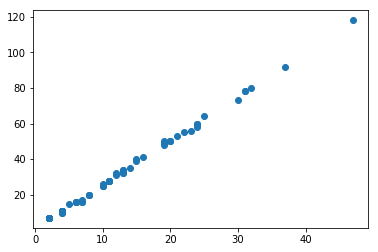

In [49]:
plt.scatter(X[:,0], X[:,1])

### Use 'Elbow' method to find optimal value of K

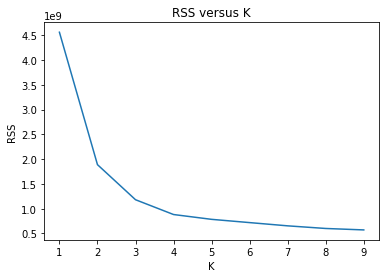

In [50]:
from sklearn.cluster import KMeans
ncluster_list = range(1,10)

def kmean_score(nclust):
    km = KMeans(nclust)
    km.fit(X)
    rss = -km.score(X)
    return rss
scores = [kmean_score(i) for i in range(1,10)]
plt.plot(range(1,10), scores)
plt.xlabel('K')
plt.ylabel('RSS')
plt.title('RSS versus K')


### Use Silhouette scores to find optimal value of K

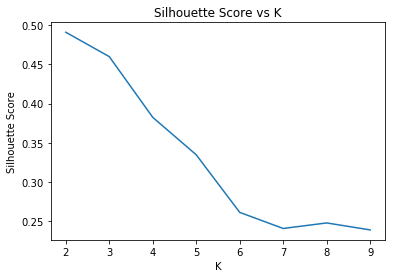

In [51]:
from sklearn.metrics import silhouette_score
def get_silhouette_score(nclust):
    km = KMeans(nclust)
    km.fit(X)
    sil_avg = silhouette_score(X, km.labels_)
    return sil_avg
sil_scores = [get_silhouette_score(i) for i in range(2,10)]
plt.plot(range(2,10), sil_scores)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')


The maximum silhouette score is at 2 and there is a local maximum at 4

### Silhouette Plots provide even more detail about each clustering

('For n_clusters =', 2, 'The average silhouette_score is :', 0.49082856194299712)


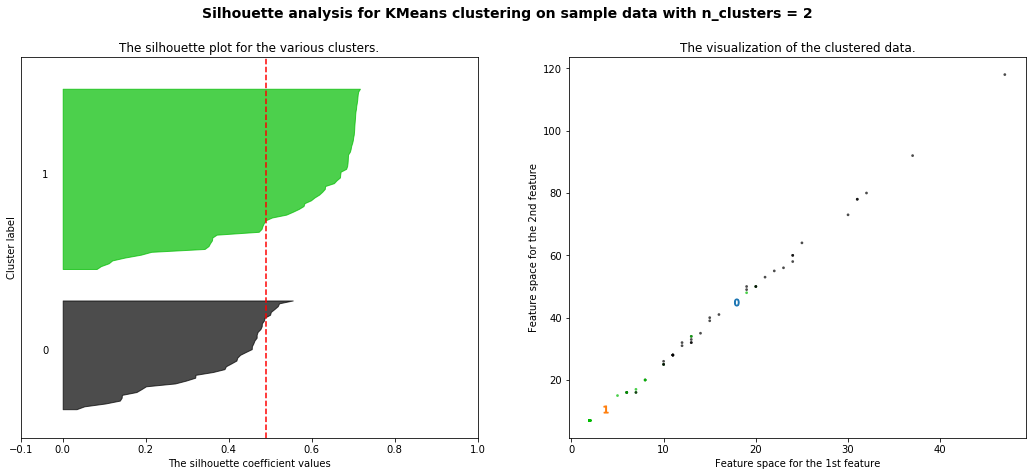

('For n_clusters =', 3, 'The average silhouette_score is :', 0.45978598246206398)


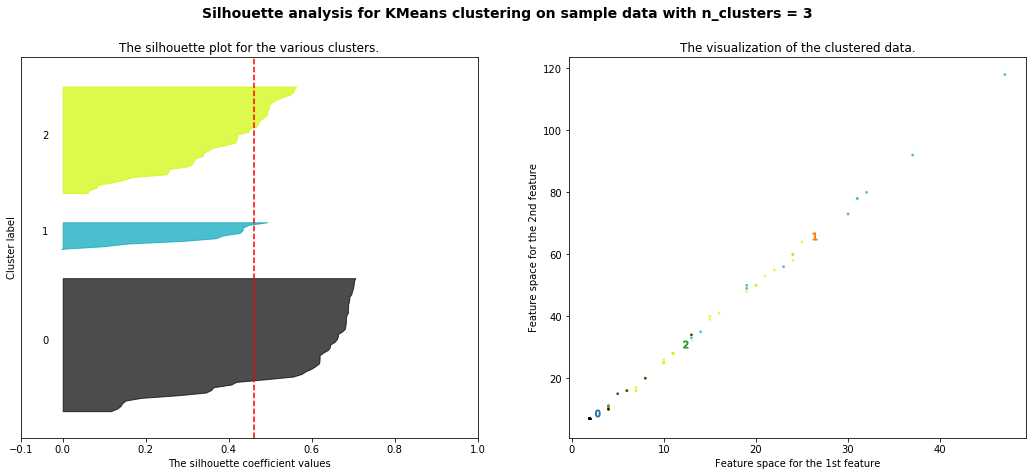

('For n_clusters =', 4, 'The average silhouette_score is :', 0.38249885743748163)


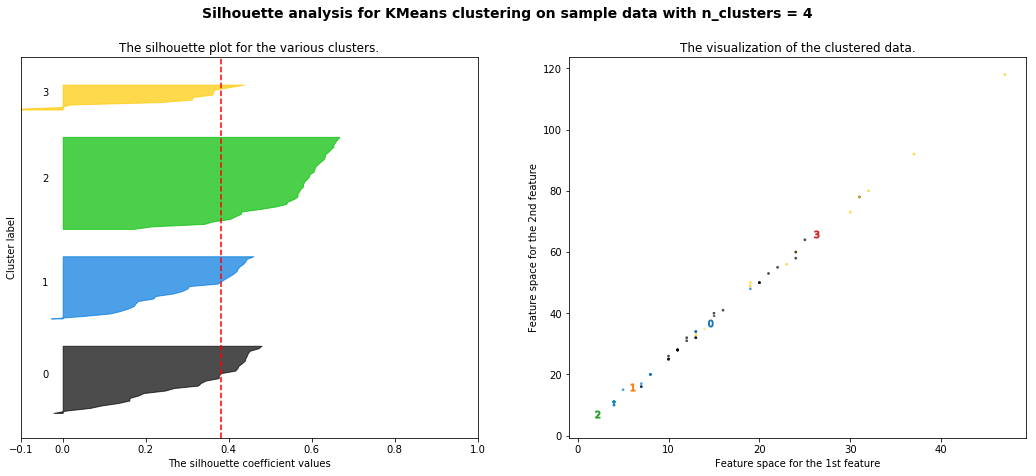

('For n_clusters =', 5, 'The average silhouette_score is :', 0.32140992682010144)


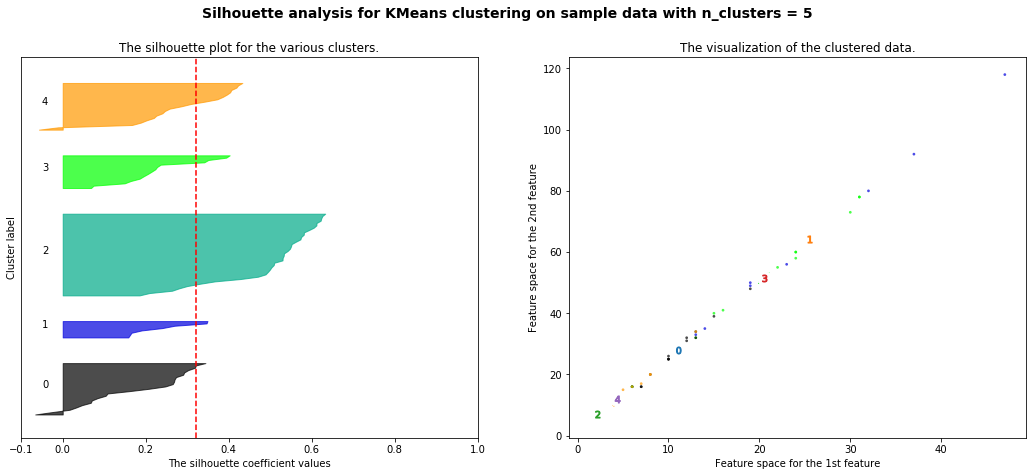

('For n_clusters =', 6, 'The average silhouette_score is :', 0.32355293997321732)


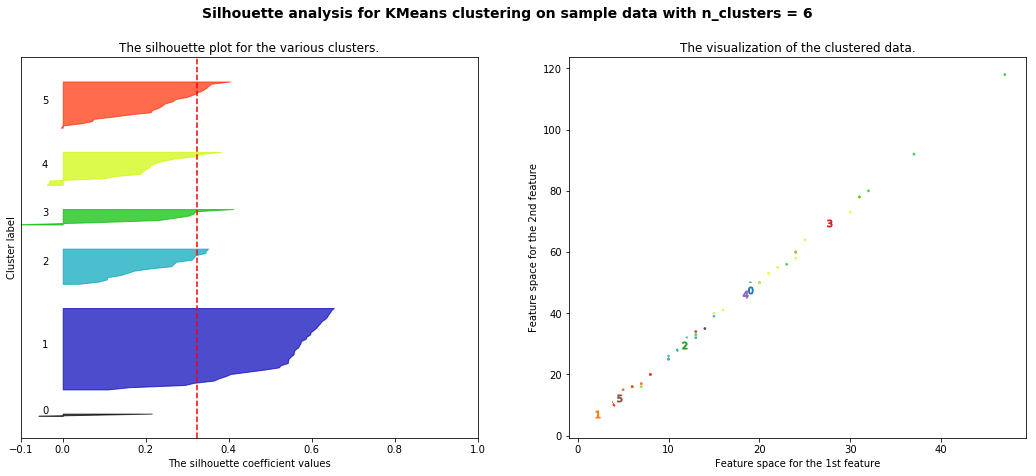

('For n_clusters =', 7, 'The average silhouette_score is :', 0.26120591551379252)


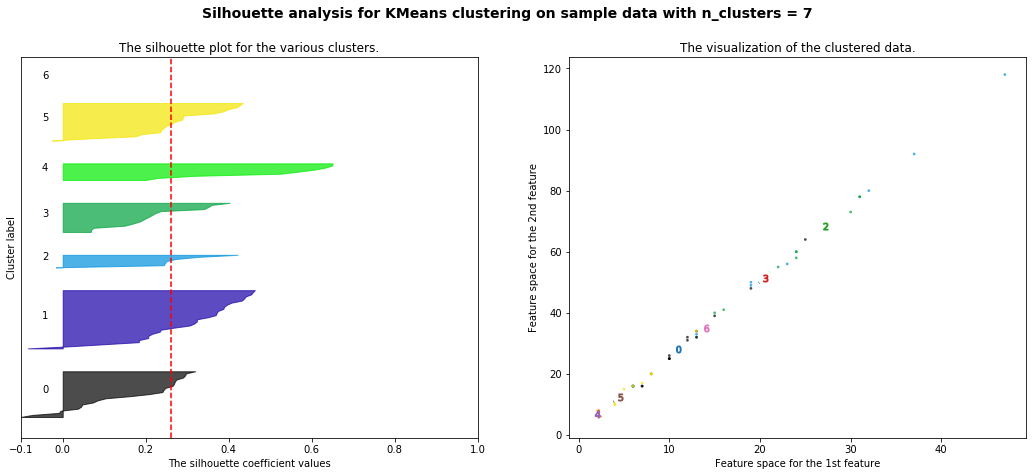

In [52]:
from helper import cluster_and_plot
for i in range(2,8):
    cluster_and_plot(X, i)